In [2]:
#Importing modules
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.integrate
from IPython.display import HTML

In [3]:
# Ensure matplotlib plots inline and animations embed as HTML5 video
%matplotlib inline

In [4]:
# Constants used for non-dimensionalization, making the equations of motion simpler to solve numerically
G = 6.67408e-11  # Gravitational constant in N-m2/kg2

In [5]:
# Reference quantities for non-dimensionalization
m_nd = 1.989e+30  # Reference mass (mass of the sun), kg
r_nd = 5.326e+12  # Reference distance, m
v_nd = 30000  # Reference velocity, m/s
t_nd = 79.91 * 365.25 * 24 * 3600  # Reference time, s

In [6]:
# Net constants derived from reference quantities, used in equations of motion
K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

In [7]:
# Define masses of the three bodies, in units relative to the reference mass
m1 = 1.1  # Star 1 mass
m2 = 0.907  # Star 2 mass
m3 = 1.425  # Star 3 mass

In [8]:
# Define initial position vectors for the three bodies, in reference units
r1 = [-0.5, 1, 0]  # Initial position of Star 1
r2 = [0.5, 0, 0.5]  # Initial position of Star 2
r3 = [0.2, 1, 1.5]  # Initial position of Star 3

In [9]:
# Convert position vectors from lists to numpy arrays for easier mathematical operations
r1 = np.array(r1)
r2 = np.array(r2)
r3 = np.array(r3)

In [10]:
# Calculate the center of mass (COM) position, considering the masses and positions of the three bodies
r_com = (m1 * r1 + m2 * r2 + m3 * r3) / (m1 + m2 + m3)

In [11]:
# Define initial velocities for the three bodies, in reference units
v1 = [0.02, 0.02, 0.02]  # Initial velocity of Star 1
v2 = [-0.05, 0, -0.1]  # Initial velocity of Star 2
v3 = [0, -0.03, 0]  # Initial velocity of Star 3

In [12]:
# Convert velocity vectors from lists to numpy arrays for easier operations
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)

In [13]:
# Calculate the velocity of the center of mass (COM), considering the masses and velocities of the three bodies
v_com = (m1 * v1 + m2 * v2 + m3 * v3) / (m1 + m2 + m3)

In [14]:
# Function that defines the equations governing the motion of the three bodies
# The function takes the current state (positions and velocities) of the bodies, the time, and the masses
# It returns the derivatives of the state (velocities and accelerations)
def ThreeBodyEquations(w, t, G, m1, m2):
    # Unpack the input array into position and velocity vectors for each body
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]

# Compute distances between the bodies
    r12 = sci.linalg.norm(r2 - r1)  # Distance between Star 1 and Star 2
    r13 = sci.linalg.norm(r3 - r1)  # Distance between Star 1 and Star 3
    r23 = sci.linalg.norm(r3 - r2)  # Distance between Star 2 and Star 3
    
    # Compute the acceleration of each body due to the gravitational attraction from the other two bodies
    dv1bydt = K1 * m2 * (r2 - r1) / r12**3 + K1 * m3 * (r3 - r1) / r13**3
    dv2bydt = K1 * m1 * (r1 - r2) / r12**3 + K1 * m3 * (r3 - r2) / r23**3
    dv3bydt = K1 * m1 * (r1 - r3) / r13**3 + K1 * m2 * (r2 - r3) / r23**3
    
    # Velocity of each body is simply the derivative of its position
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    dr3bydt = K2 * v3
    
    # Combine all derivatives into a single array to return
    r12_derivs = np.concatenate((dr1bydt, dr2bydt))
    r_derivs = np.concatenate((r12_derivs, dr3bydt))
    v12_derivs = np.concatenate((dv1bydt, dv2bydt))
    v_derivs = np.concatenate((v12_derivs, dv3bydt))
    derivs = np.concatenate((r_derivs, v_derivs))
    return derivs

In [15]:
# Initial conditions: Flatten the initial position and velocity arrays into a single array for the ODE solver
init_params = np.array([r1, r2, r3, v1, v2, v3])  # Initial positions and velocities
init_params = init_params.flatten()  # Flatten to make it a 1D array for the solver
time_span = np.linspace(0, 20, 1000)  # Simulate for 20 units of time with 1000 points in between

In [16]:
# Use scipy's ODE integrator to solve the three body equations
three_body_sol = sci.integrate.odeint(ThreeBodyEquations, init_params, time_span, args=(G, m1, m2))

In [17]:
# Extract solutions for each star's position over time
r1_sol = three_body_sol[:, :3]
r2_sol = three_body_sol[:, 3:6]
r3_sol = three_body_sol[:, 6:9]

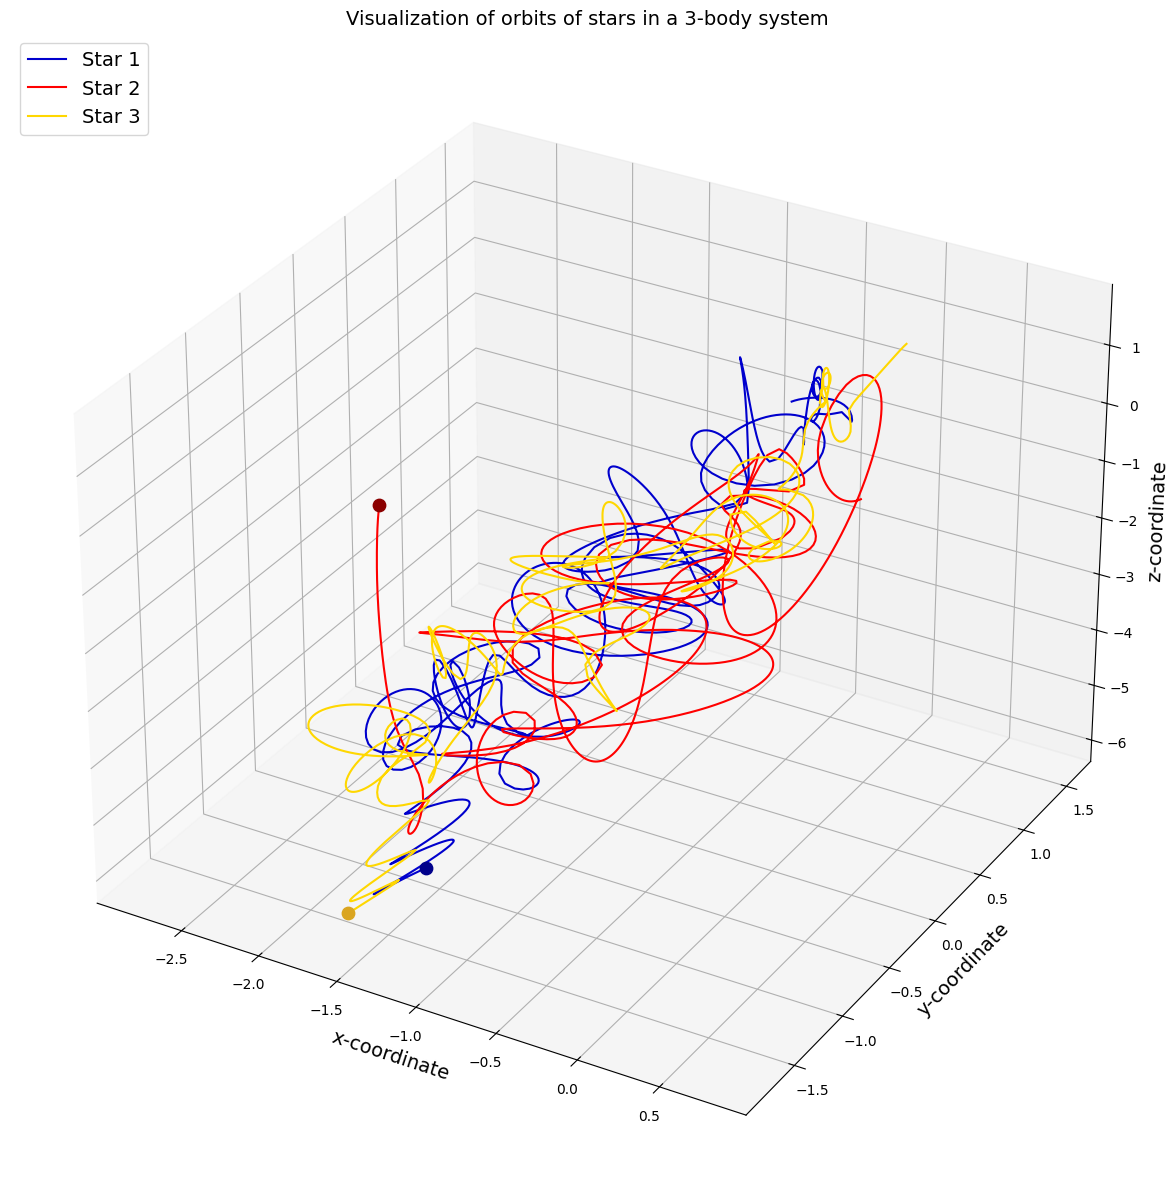

In [18]:
# Plot the orbits of the three bodies.
# Set up the figure for plotting the orbits of the three bodies
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

# Plot the orbit of each star using the solutions obtained from the ODE solver
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="mediumblue", label="Star 1")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="red", label="Star 2")
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color="gold", label="Star 3")

# Mark the final positions of each star with a larger dot
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], r1_sol[-1, 2], color="darkblue", marker="o", s=80)
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], r2_sol[-1, 2], color="darkred", marker="o", s=80)
ax.scatter(r3_sol[-1, 0], r3_sol[-1, 1], r3_sol[-1, 2], color="goldenrod", marker="o", s=80)

# Label the axes and set a title for the plot
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a 3-body system", fontsize=14)
ax.legend(loc="upper left", fontsize=14)  # Add a legend


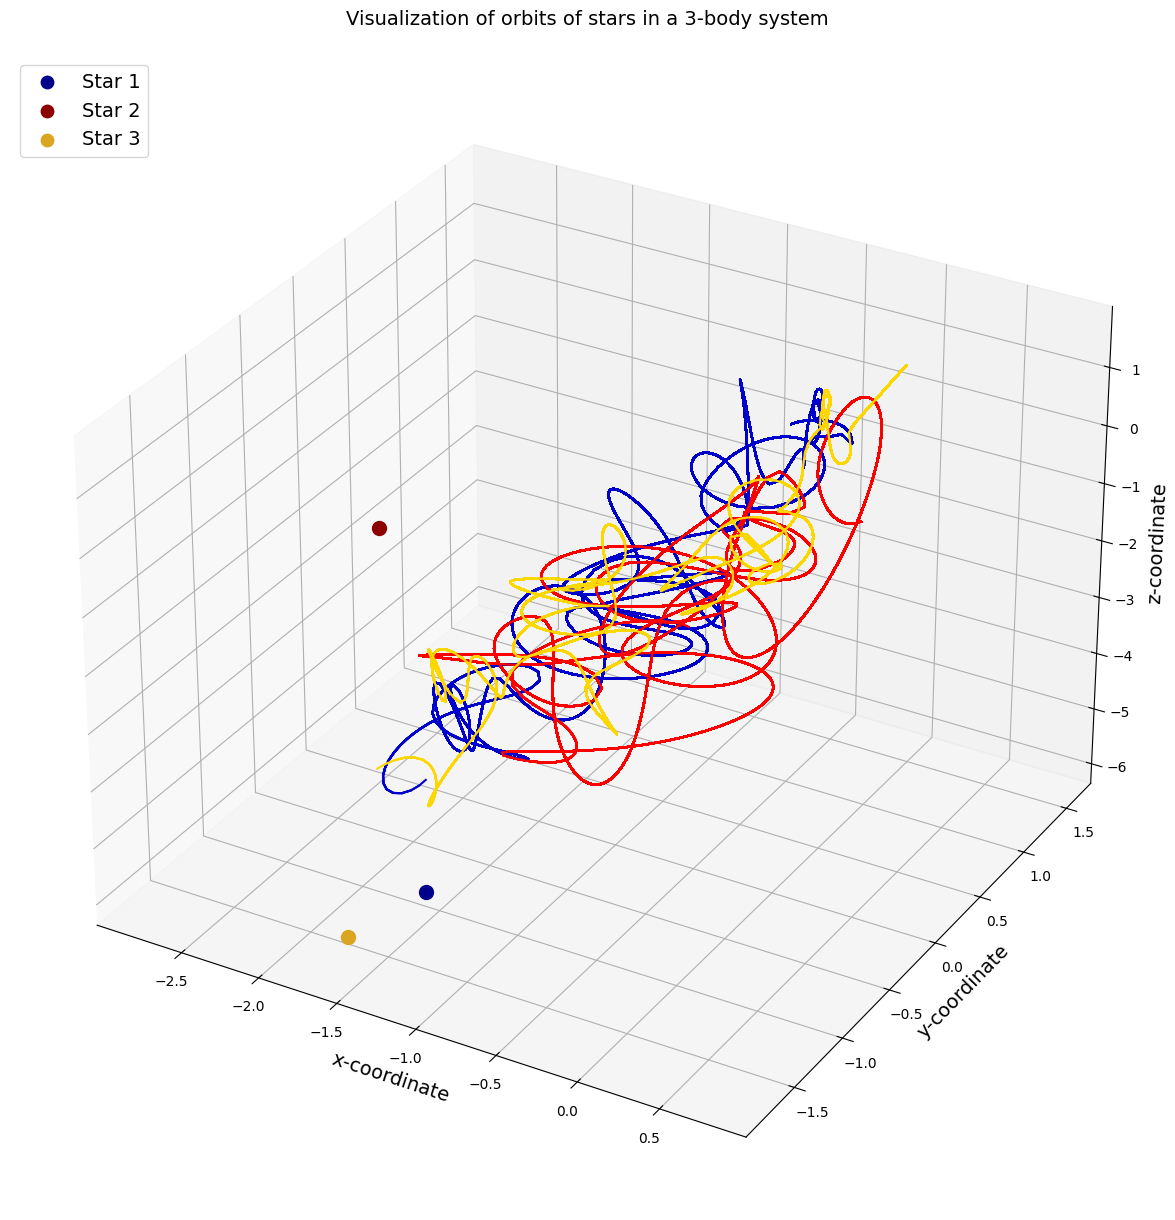

In [19]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection="3d")

#Create new arrays for animation, this gives you the flexibility
#to reduce the number of points in the animation if it becomes slow
#Currently set to select every 4th point
r1_sol_anim = r1_sol[::1,:].copy()
r2_sol_anim = r2_sol[::1,:].copy()
r3_sol_anim = r3_sol[::1,:].copy()

# Initial markers for planets
head1 = [ax.scatter(r1_sol_anim[0,0], r1_sol_anim[0,1], r1_sol_anim[0,2], color="darkblue", marker="o", s=80, label="Star 1")]
head2 = [ax.scatter(r2_sol_anim[0,0], r2_sol_anim[0,1], r2_sol_anim[0,2], color="darkred", marker="o", s=80, label="Star 2")]
head3 = [ax.scatter(r3_sol_anim[0,0], r3_sol_anim[0,1], r3_sol_anim[0,2], color="goldenrod", marker="o", s=80, label="Star 3")]

# Function to animate the orbits
def Animate(i, head1, head2, head3):
    # Remove old markers
    head1[0].remove()
    head2[0].remove()
    head3[0].remove()
    
    # Plot the orbits
    ax.plot(r1_sol_anim[:i,0], r1_sol_anim[:i,1], r1_sol_anim[:i,2], color="mediumblue")
    ax.plot(r2_sol_anim[:i,0], r2_sol_anim[:i,1], r2_sol_anim[:i,2], color="red")
    ax.plot(r3_sol_anim[:i,0], r3_sol_anim[:i,1], r3_sol_anim[:i,2], color="gold")
    
    # Plot the current markers
    head1[0] = ax.scatter(r1_sol_anim[i-1,0], r1_sol_anim[i-1,1], r1_sol_anim[i-1,2], color="darkblue", marker="o", s=100)
    head2[0] = ax.scatter(r2_sol_anim[i-1,0], r2_sol_anim[i-1,1], r2_sol_anim[i-1,2], color="darkred", marker="o", s=100)
    head3[0] = ax.scatter(r3_sol_anim[i-1,0], r3_sol_anim[i-1,1], r3_sol_anim[i-1,2], color="goldenrod", marker="o", s=100)
    return head1, head2, head3,

# Additional settings for the plot
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a 3-body system\n", fontsize=14)
ax.legend(loc="upper left", fontsize=14)

# Creating the animation
repeatanim = animation.FuncAnimation(fig, Animate, frames=800, interval=10, blit=False, fargs=(head1, head2, head3))

# Displaying the animation in the notebook
HTML(repeatanim.to_html5_video())

In [ ]:
# Should you want to get a movie file for the genrated automation 'ffmpeg' needs to be installed
# Saving the animation to a file
repeatanim.save('my_animation.mp4', writer='ffmpeg', fps=20)